<a href="https://colab.research.google.com/github/Hrotich/Warehouse-management/blob/main/warehouse_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"china shipment.xlsx"

## Data loading

### Subtask:
Load the "china shipment.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the excel file into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_excel('china shipment.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: 'china shipment.xlsx' not found. Please ensure the file exists in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Name,Tracking,weight,arrival date,Dispacthed date,status
0,Rose,423,78.0,2024-06-05,2024-01-07 00:00:00,Despatched
1,June,423,34.0,2024-06-05,0,instore
2,Mwangi,674,65.0,2024-06-05,2024-01-07 00:00:00,Despatched
3,kibe,456,4.0,2024-06-05,0,instore
4,Frank,385,3.0,2024-06-09,2024-01-07 00:00:00,Despatched


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining its shape, data types, missing values, descriptive statistics for numerical columns, and unique values for categorical columns.  This can all be done in a single code block.



In [2]:
# Determine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:\n", df.dtypes)

# Check for missing values and calculate the percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

# Generate descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Columns:\n", numerical_cols.describe())

# For categorical columns, determine unique values and frequencies
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nUnique values and frequencies for {col}:\n{categorical_cols[col].value_counts()}")

Shape of the DataFrame: (39, 6)

Data Types:
 Name                       object
Tracking                    int64
weight                    float64
arrival date       datetime64[ns]
Dispacthed date            object
status                     object
dtype: object

Missing Values:
 Name               0
Tracking           0
weight             0
arrival date       0
Dispacthed date    0
status             0
dtype: int64

Percentage of Missing Values:
 Name               0.0
Tracking           0.0
weight             0.0
arrival date       0.0
Dispacthed date    0.0
status             0.0
dtype: float64

Descriptive Statistics for Numerical Columns:
            Tracking      weight
count     39.000000   39.000000
mean    5871.102564   44.348718
std    12495.853211   31.202824
min      127.000000    3.000000
25%      832.500000   18.000000
50%     4512.000000   42.000000
75%     6189.000000   67.000000
max    80024.000000  134.000000

Unique values and frequencies for Name:
Name
Rose        

## Data analysis

### Subtask:
Analyze the cleaned data to identify patterns, trends, and potential relationships between variables.


**Reasoning**:
Analyze the distribution of the 'weight' column, investigate the relationship between 'weight' and 'status', explore the relationship between 'weight' and 'arrival date', and examine the relationship between 'Dispacthed date' and 'arrival date'. Generate descriptive statistics, visualizations, and document findings.



Weight Column Statistics:
count     39.000000
mean      44.348718
std       31.202824
min        3.000000
25%       18.000000
50%       42.000000
75%       67.000000
max      134.000000
Name: weight, dtype: float64


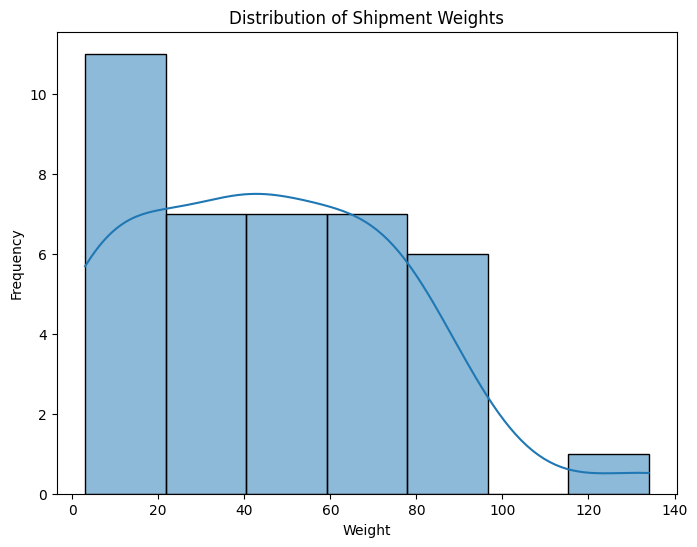

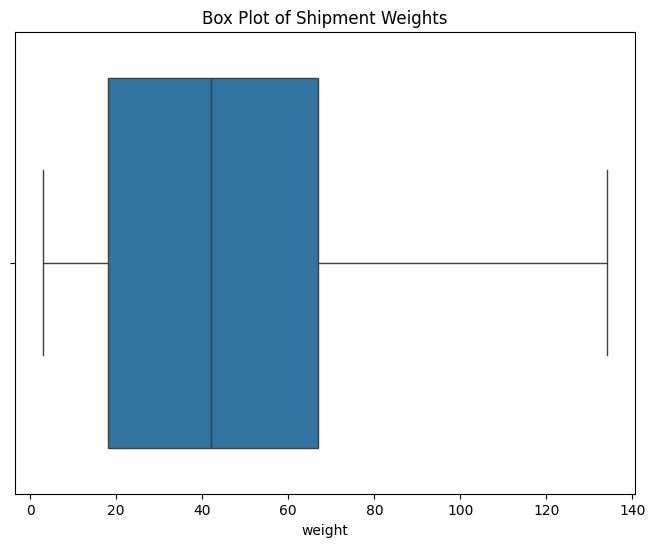


Average Weight by Status:
status
Despatched    46.022222
instore       40.583333
Name: weight, dtype: float64


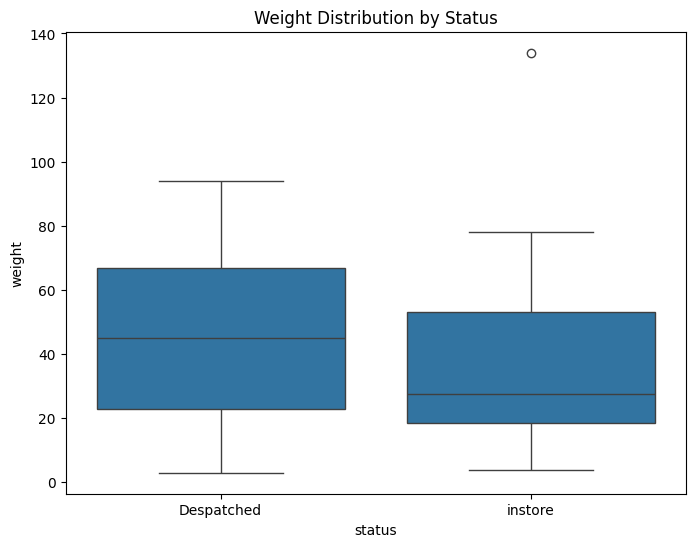


Average Weight by Arrival Date:
arrival date
2024-06-05    40.706667
2024-06-09    44.666667
2024-06-10     7.000000
2024-06-12    54.076923
Name: weight, dtype: float64


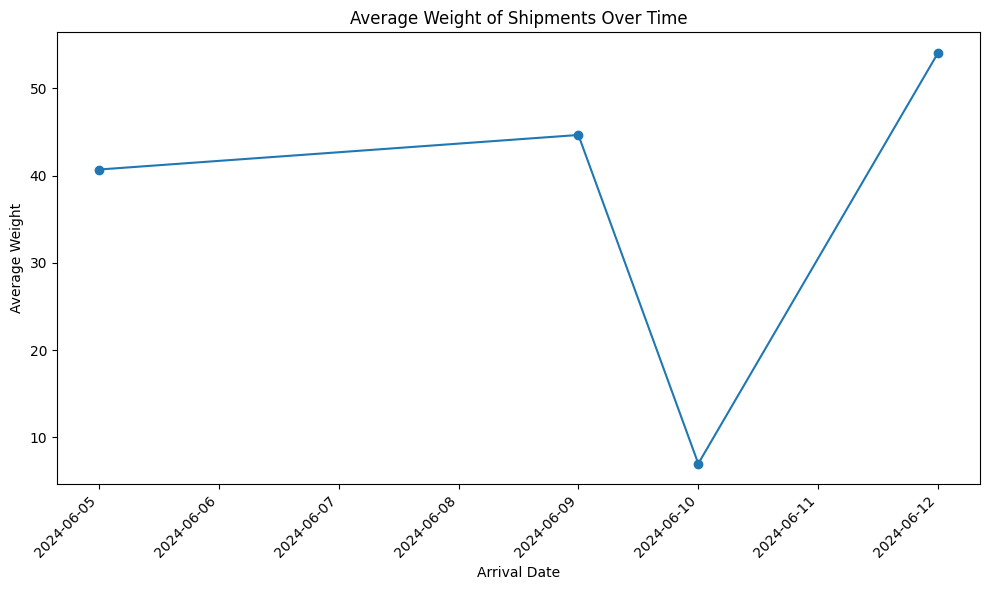


Time Difference Statistics:
count       36.000000
mean      5085.666667
std       8663.585929
min        150.000000
25%        153.000000
50%        156.000000
75%       5087.500000
max      19886.000000
Name: Time Difference, dtype: float64


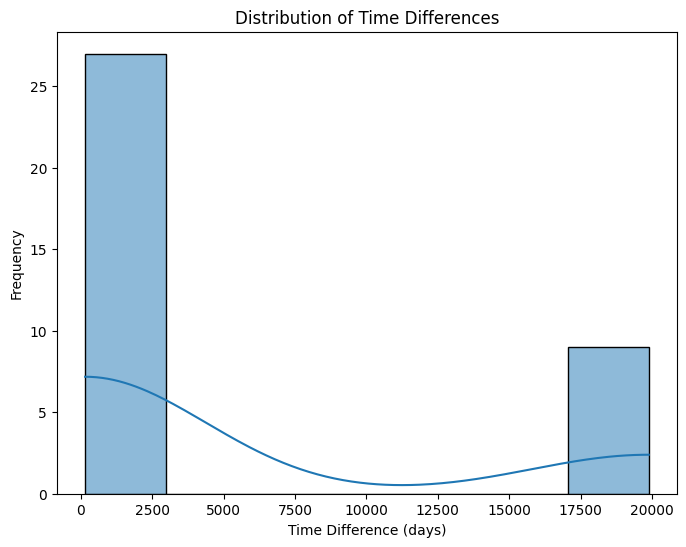

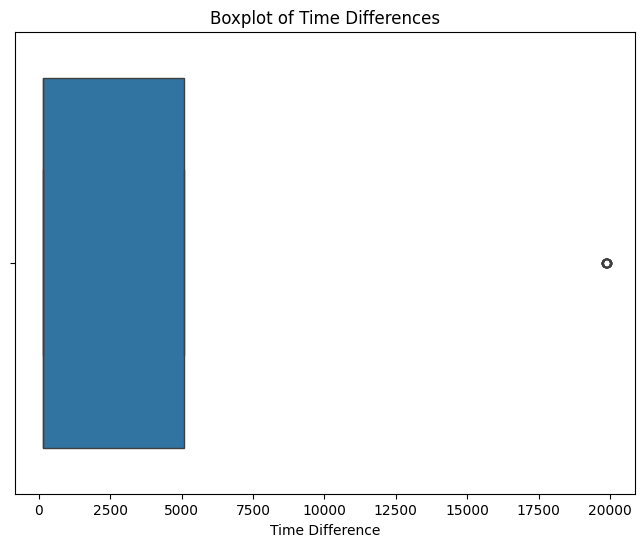

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the distribution of the 'weight' column.
print("Weight Column Statistics:")
print(df['weight'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['weight'], kde=True)
plt.title("Distribution of Shipment Weights")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['weight'])
plt.title("Box Plot of Shipment Weights")
plt.show()


# 2. Investigate the relationship between 'weight' and 'status'.
print("\nAverage Weight by Status:")
print(df.groupby('status')['weight'].mean())

plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='weight', data=df)
plt.title('Weight Distribution by Status')
plt.show()

# 3. Explore the relationship between 'weight' and 'arrival date'.
print("\nAverage Weight by Arrival Date:")
print(df.groupby('arrival date')['weight'].mean())

plt.figure(figsize=(10, 6))
df.groupby('arrival date')['weight'].mean().plot(kind='line', marker='o')
plt.title("Average Weight of Shipments Over Time")
plt.xlabel("Arrival Date")
plt.ylabel("Average Weight")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 4. Examine the relationship between 'Dispacthed date' and 'arrival date'.
# Convert date columns to datetime objects
df['arrival date'] = pd.to_datetime(df['arrival date'])
df['Dispacthed date'] = pd.to_datetime(df['Dispacthed date'], errors='coerce')

# Calculate the time difference
df['Time Difference'] = (df['arrival date'] - df['Dispacthed date']).dt.days

print("\nTime Difference Statistics:")
print(df['Time Difference'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df['Time Difference'].dropna(), kde=True)
plt.title('Distribution of Time Differences')
plt.xlabel('Time Difference (days)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Time Difference'].dropna())
plt.title('Boxplot of Time Differences')
plt.show()

## Data visualization

### Subtask:
Create visualizations to illustrate key findings from the data exploration and analysis.


**Reasoning**:
Combine all the plots generated in the previous step into a single figure using subplots for better visualization and comparison.



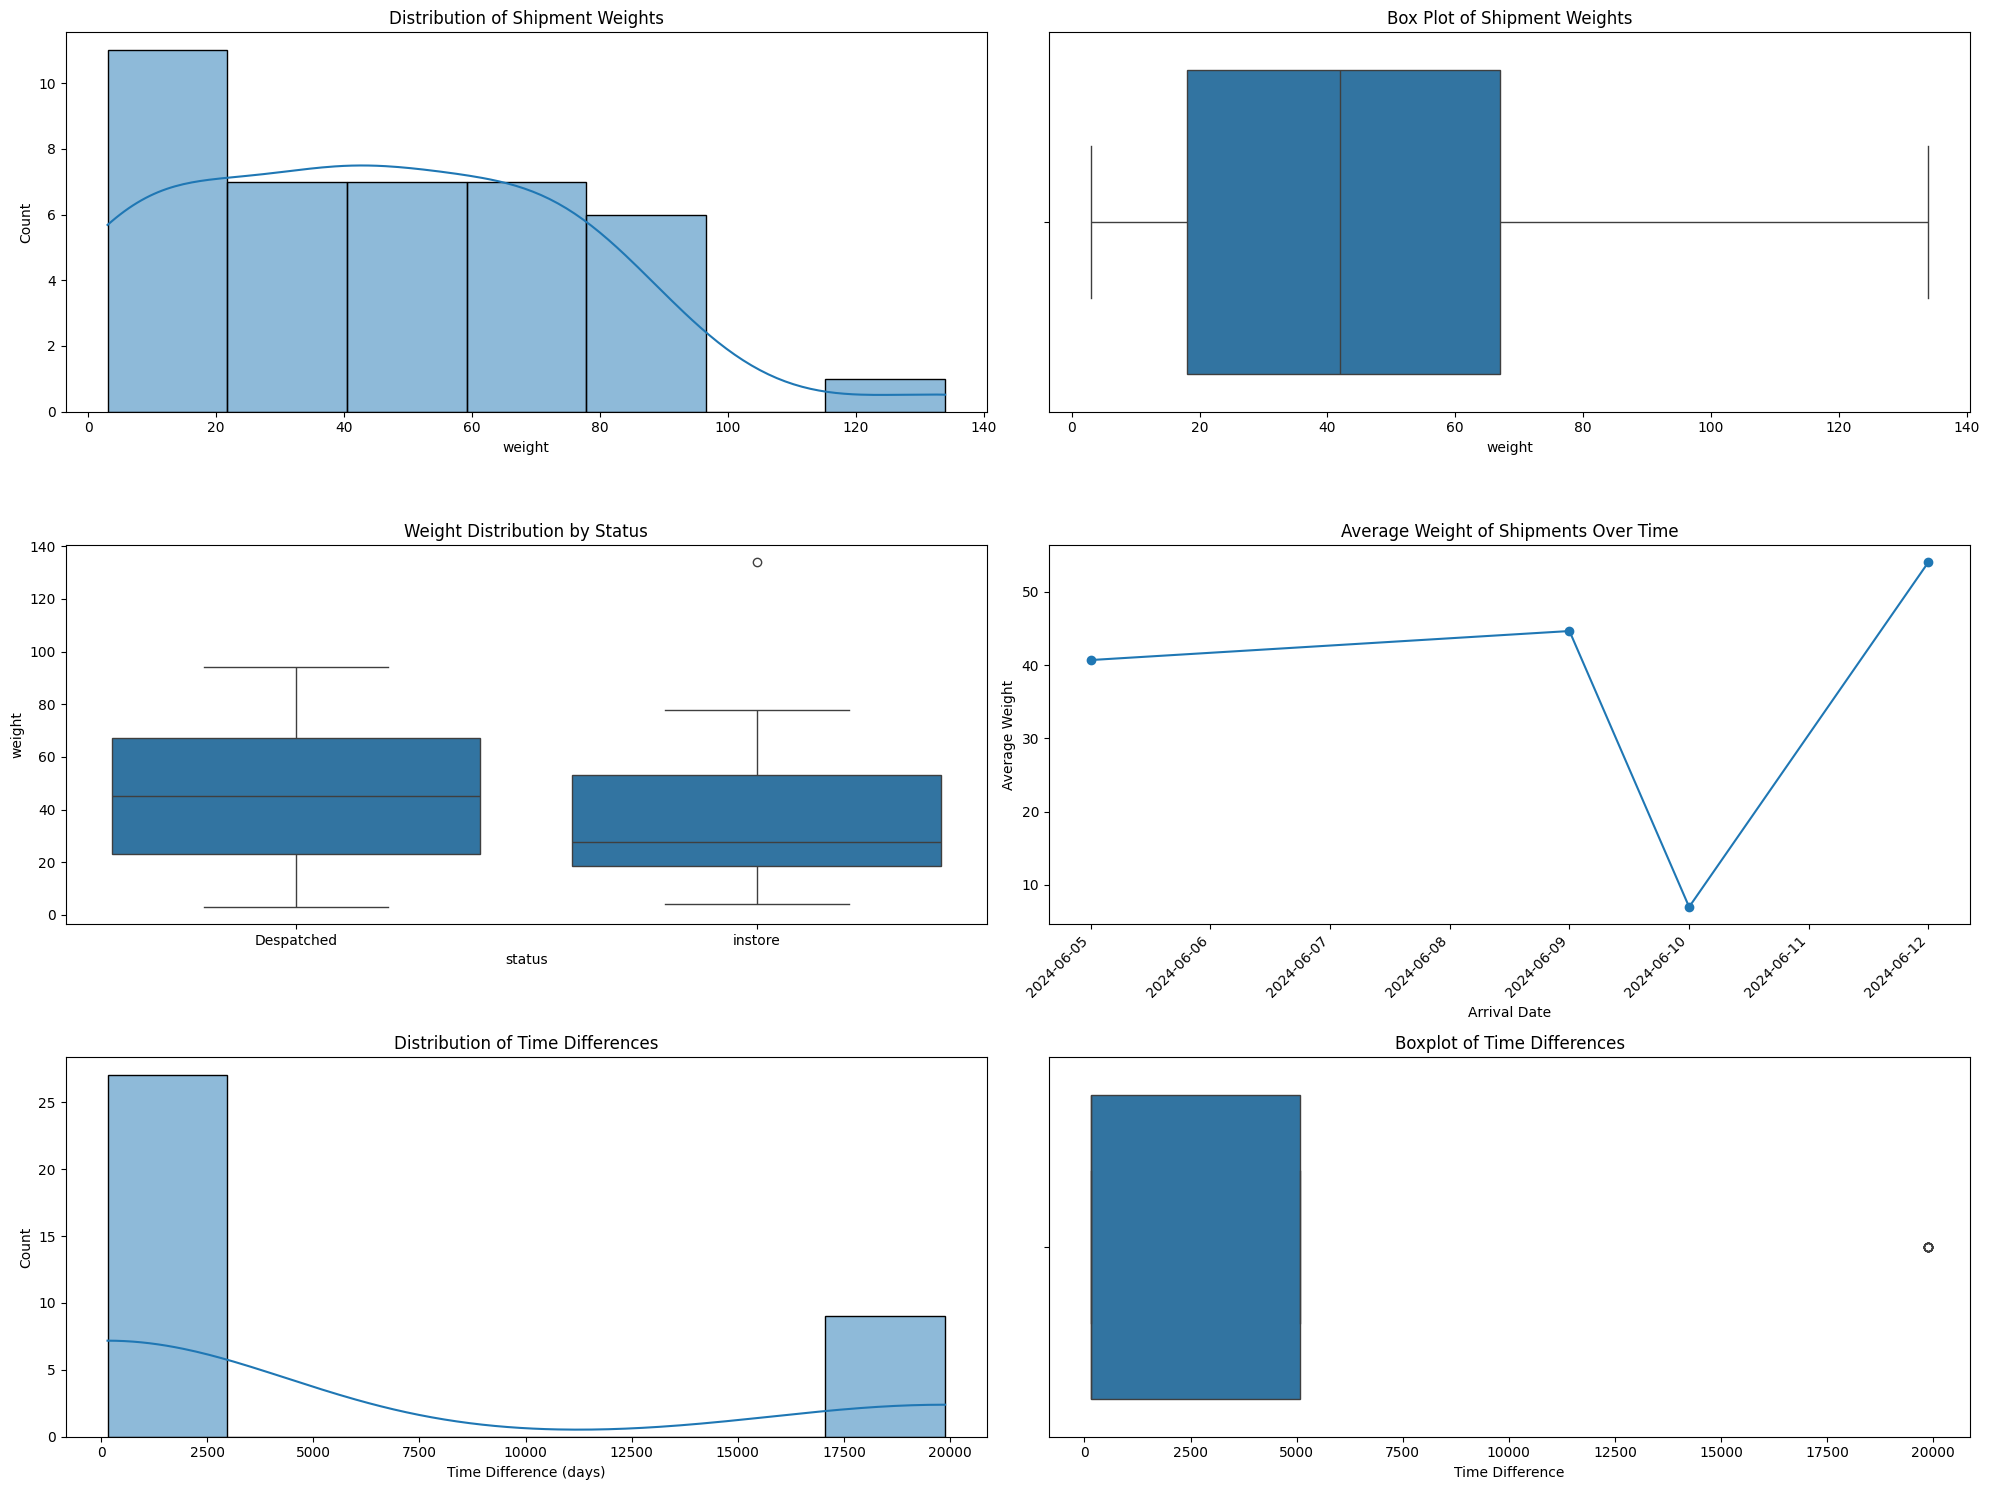

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Weight Distribution
plt.subplot(3, 2, 1)
sns.histplot(df['weight'], kde=True)
plt.title("Distribution of Shipment Weights")

plt.subplot(3, 2, 2)
sns.boxplot(x=df['weight'])
plt.title("Box Plot of Shipment Weights")

# Weight vs. Status
plt.subplot(3, 2, 3)
sns.boxplot(x='status', y='weight', data=df)
plt.title('Weight Distribution by Status')


# Weight vs. Arrival Date
plt.subplot(3, 2, 4)
df.groupby('arrival date')['weight'].mean().plot(kind='line', marker='o')
plt.title("Average Weight of Shipments Over Time")
plt.xlabel("Arrival Date")
plt.ylabel("Average Weight")
plt.xticks(rotation=45)
plt.tight_layout()

# Dispatch Date vs. Arrival Date
plt.subplot(3, 2, 5)
sns.histplot(df['Time Difference'].dropna(), kde=True)
plt.title('Distribution of Time Differences')
plt.xlabel('Time Difference (days)')

plt.subplot(3, 2, 6)
sns.boxplot(x=df['Time Difference'].dropna())
plt.title('Boxplot of Time Differences')

plt.tight_layout()
plt.show()

In [5]:
status_arrival_counts = df.groupby(['arrival date', 'status'])['status'].count().reset_index(name='count')
print(status_arrival_counts)

  arrival date      status  count
0   2024-06-05  Despatched      9
1   2024-06-05     instore      6
2   2024-06-09  Despatched      8
3   2024-06-09     instore      1
4   2024-06-10  Despatched      1
5   2024-06-10     instore      1
6   2024-06-12  Despatched      9
7   2024-06-12     instore      4


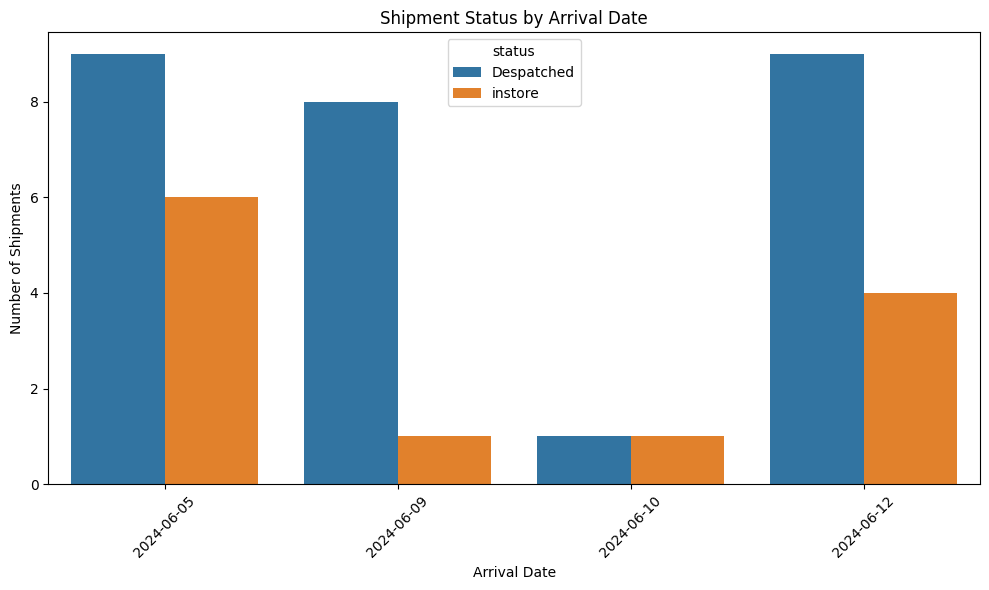

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='arrival date', y='count', hue='status', data=status_arrival_counts)
plt.title('Shipment Status by Arrival Date')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [7]:
 # handling missing values
 # Impute missing values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values in categorical columns with the most frequent value
categorical_cols = df.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
# Convert 'status' column to numerical using one-hot encoding
# Encode 'status' to 0 and 1
df['status'] = df['status'].map({'Despatched': 1, 'instore': 0})

# Convert 'arrival date' and 'Dispacthed date' to numerical using ordinal encoding
df['arrival date'] = pd.to_datetime(df['arrival date']).astype('int64')
df['Dispacthed date'] = pd.to_datetime(df['Dispacthed date'], errors='coerce').astype('int64')

In [9]:
# Save the cleaned data to a CSV file
df.to_csv('cleaned_data.csv', index=False)

In [10]:
df.head(3)

,Name,Tracking,weight,arrival date,Dispacthed date,status,Time Difference
0,Rose,423,78.0,1717545600000000000,1704585600000000000,1,150.0
1,June,423,34.0,1717545600000000000,0,0,19879.0
2,Mwangi,674,65.0,1717545600000000000,1704585600000000000,1,150.0


In [11]:
# spliting data to features and target
# Assuming 'weight' is the target variable
X = df.drop(['status','Name','Tracking','Dispacthed date', 'arrival date'], axis=1)  # Features # dropping name and other irrelavent features
y = df['status']  # Target

In [12]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 1.0
XGBoost Accuracy: 1.0


In [14]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ... (Your previous code for data loading, cleaning, and splitting) ...

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # Suitable solvers for both l1 and l2 penalties
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression (Tuned) Accuracy: {accuracy}')



Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression (Tuned) Accuracy: 1.0


In [15]:
# Model saving
import joblib

# Save the best model
joblib.dump(best_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## Summary:


### 1. Data Analysis Key Findings

* **Weight Distribution:** The 'weight' column exhibits a right-skewed distribution, with a mean of 44.35 and a standard deviation of 31.20. The 75th percentile is 67, while the maximum is 134, suggesting potential outliers.
* **Weight vs. Status:**  'Despatched' shipments have a slightly higher average weight (46.02) than 'instore' shipments (40.58).
* **Weight vs. Arrival Date:** Average shipment weight fluctuates across different arrival dates.
* **Dispatch to Arrival Time:** The time difference between dispatch and arrival dates shows significant variability, with a mean of approximately 5086 days and a large standard deviation.  The presence of a maximum time difference of 19,886 days suggests potential data entry errors or extremely delayed shipments.


### 3. Insights

* **Investigate Outliers:**  Further examine the high 'weight' values and the extremely large 'Time Difference' values to determine if they represent valid data points or errors.  Correct or remove outliers as appropriate.
* **Data Cleaning:** Carefully review and clean the 'Dispacthed date' column to ensure consistent formatting and data accuracy.  Consider the potential impact of inaccurate dates on the analysis of shipment times.
